In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Beautiful graphs
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [13]:
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Show info and missing values
df.info()

Shape: (8807, 12)

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [15]:
# Make a copy to clean
netflix = df.copy()

# 1. Handle missing values
netflix['director'].fillna('Unknown', inplace=True)
netflix['cast'].fillna('Unknown', inplace=True)
netflix['country'].fillna('Unknown', inplace=True)
netflix['date_added'].fillna('Unknown', inplace=True)
netflix['rating'].fillna(netflix['rating'].mode()[0], inplace=True)
netflix['duration'].fillna('Unknown', inplace=True)

# 2. Convert date_added to datetime
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')

# 3. Extract year added
netflix['year_added'] = netflix['date_added'].dt.year

# 4. Separate Movies and TV Shows
movies = netflix[netflix['type'] == 'Movie']
tv_shows = netflix[netflix['type'] == 'TV Show']

print("Total Movies:", len(movies))
print("Total TV Shows:", len(tv_shows))

Total Movies: 6131
Total TV Shows: 2676


In [16]:
# Many titles have multiple genres and countries
# Let's explode them into separate rows for better counting

# Genres
netflix_genres = netflix.copy()
netflix_genres['listed_in'] = netflix_genres['listed_in'].str.split(', ')
netflix_genres = netflix_genres.explode('listed_in')
netflix_genres['listed_in'] = netflix_genres['listed_in'].str.strip()

# Countries
netflix_countries = netflix.copy()
netflix_countries['country'] = netflix_countries['country'].str.split(', ')
netflix_countries = netflix_countries.explode('country')
netflix_countries['country'] = netflix_countries['country'].str.strip()
netflix_countries = netflix_countries[netflix_countries['country'] != 'Unknown']

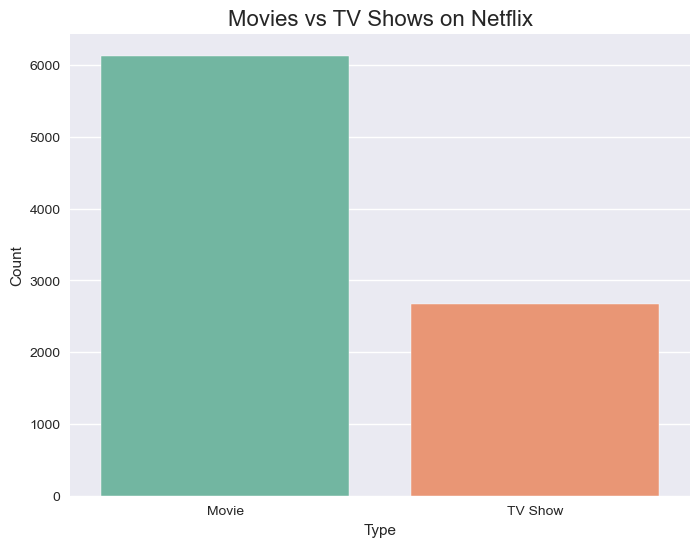

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [17]:
plt.figure(figsize=(8,6))
sns.countplot(data=netflix, x='type', palette='Set2')
plt.title('Movies vs TV Shows on Netflix', fontsize=16)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

print(netflix['type'].value_counts())

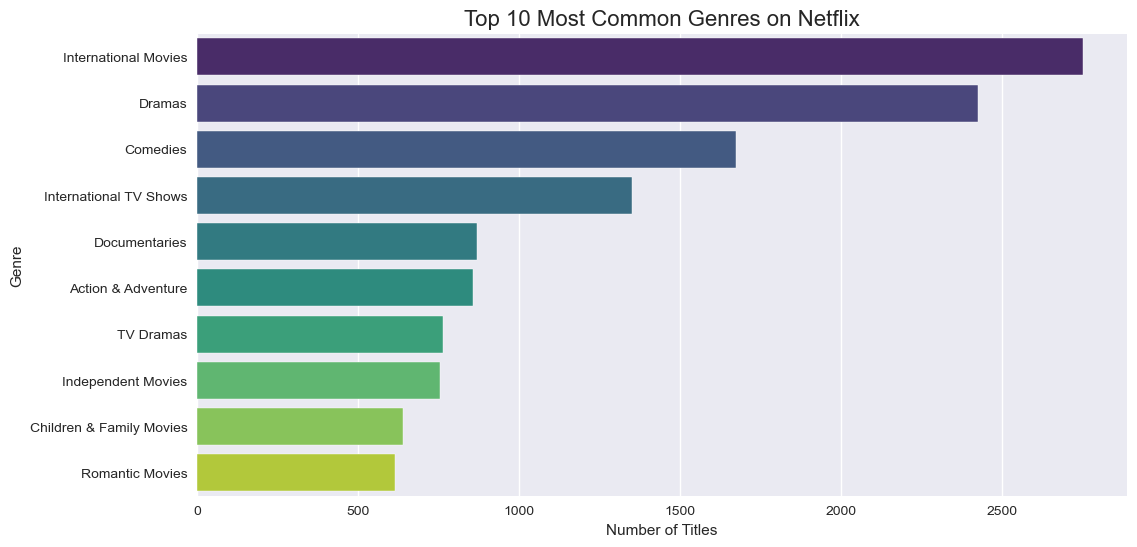

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [18]:
plt.figure(figsize=(12,6))
top_genres = netflix_genres['listed_in'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

print(top_genres)

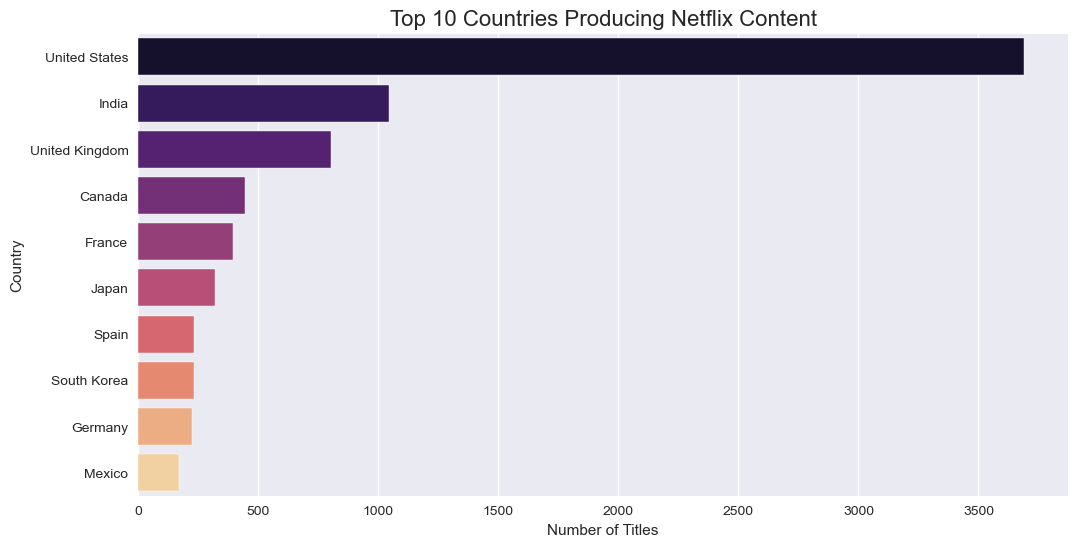

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


In [19]:
plt.figure(figsize=(12,6))
top_countries = netflix_countries['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries Producing Netflix Content', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

print(top_countries)

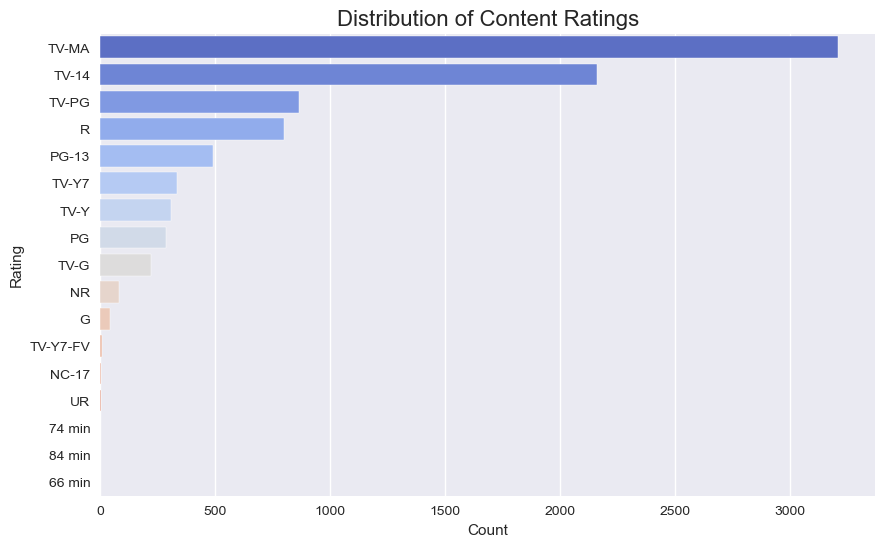

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [20]:
plt.figure(figsize=(10,6))
rating_order = netflix['rating'].value_counts().index
sns.countplot(data=netflix, y='rating', order=rating_order, palette='coolwarm')
plt.title('Distribution of Content Ratings', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

print(netflix['rating'].value_counts())

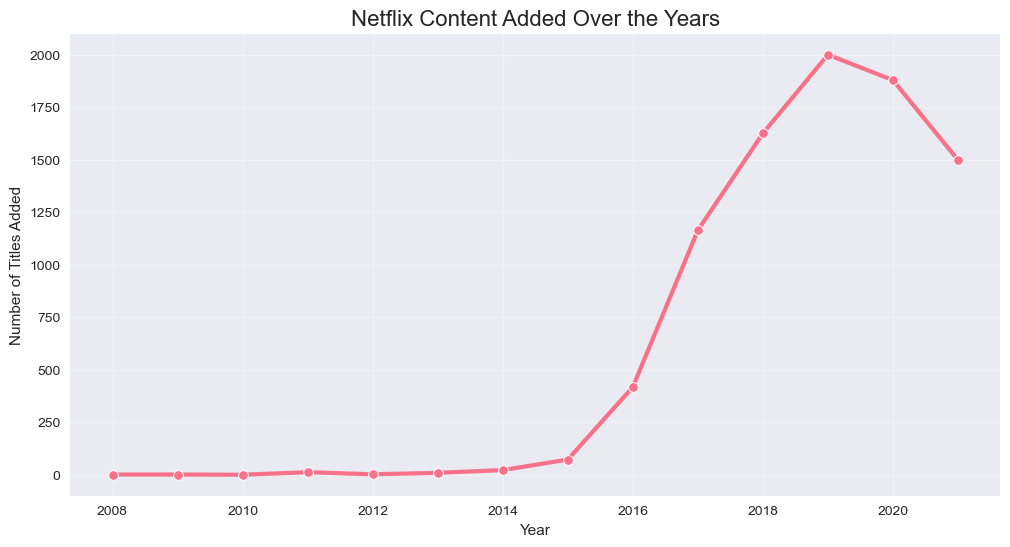

In [21]:
# Only take valid years
year_counts = netflix[netflix['year_added'].notna()]['year_added'].value_counts().sort_index()
year_counts = year_counts[year_counts.index >= 2008]  # Netflix started growing here

plt.figure(figsize=(12,6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', linewidth=3)
plt.title('Netflix Content Added Over the Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True, alpha=0.3)
plt.show()

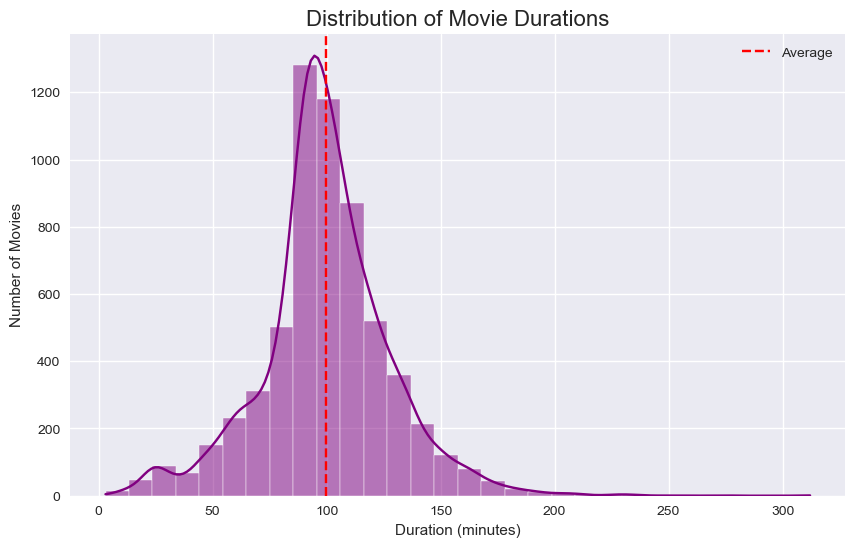

Average movie length: 100 minutes


In [22]:
# Extract numeric minutes from duration for movies
movies_clean = movies[movies['duration'].str.contains('min')]
movies_clean['duration_min'] = movies_clean['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10,6))
sns.histplot(movies_clean['duration_min'], bins=30, kde=True, color='purple')
plt.title('Distribution of Movie Durations', fontsize=16)
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.axvline(movies_clean['duration_min'].mean(), color='red', linestyle='--', label='Average')
plt.legend()
plt.show()

print(f"Average movie length: {movies_clean['duration_min'].mean():.0f} minutes")